In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
states = pd.read_csv('nytimes-us-states.csv')

In [3]:
states.head(3)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0


In [4]:
states.tail()

,date,state,fips,cases,deaths
1494,2020-03-29,Virginia,51,890,22
1495,2020-03-29,Washington,53,4896,207
1496,2020-03-29,West Virginia,54,124,1
1497,2020-03-29,Wisconsin,55,1120,17
1498,2020-03-29,Wyoming,56,87,0


In [5]:
states.shape

(1499, 5)

In [6]:
states.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [7]:
states.index

RangeIndex(start=0, stop=1499, step=1)

In [8]:
states.values

array([['2020-01-21', 'Washington', 53, 1, 0],
       ['2020-01-22', 'Washington', 53, 1, 0],
       ['2020-01-23', 'Washington', 53, 1, 0],
       ...,
       ['2020-03-29', 'West Virginia', 54, 124, 1],
       ['2020-03-29', 'Wisconsin', 55, 1120, 17],
       ['2020-03-29', 'Wyoming', 56, 87, 0]], dtype=object)

In [9]:
states.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [10]:
state_names = states['state']
state_names

0          Washington
1          Washington
2          Washington
3            Illinois
4          Washington
            ...      
1494         Virginia
1495       Washington
1496    West Virginia
1497        Wisconsin
1498          Wyoming
Name: state, Length: 1499, dtype: object

In [11]:
state_names.value_counts(normalize=True)

Washington                  0.046031
Illinois                    0.044029
California                  0.043362
Arizona                     0.042695
Massachusetts               0.038692
Wisconsin                   0.036024
Texas                       0.031354
Nebraska                    0.028019
Utah                        0.022682
Oregon                      0.020680
Rhode Island                0.019346
New York                    0.019346
Florida                     0.019346
Georgia                     0.018679
New Hampshire               0.018679
North Carolina              0.018012
New Jersey                  0.017345
Maryland                    0.016678
Nevada                      0.016678
Tennessee                   0.016678
Colorado                    0.016678
Hawaii                      0.016011
Indiana                     0.016011
Kentucky                    0.016011
Minnesota                   0.016011
Pennsylvania                0.016011
Oklahoma                    0.016011
S

In [12]:
cases= states['cases']
cases.describe()

count     1499.000000
mean       495.576384
std       2985.218799
min          1.000000
25%          4.000000
50%         27.000000
75%        172.500000
max      59568.000000
Name: cases, dtype: float64

In [13]:
[cases.mean(), cases.std(), cases.min(), cases.max()]

[495.5763842561708, 2985.2187987434295, 1, 59568]

In [14]:
cases.quantile([.2, .4, .8, .9])

0.2      2.0
0.4     13.0
0.8    266.4
0.9    763.2
Name: cases, dtype: float64

In [15]:
states[state_names == 'Minnesota']

,date,state,fips,cases,deaths
333,2020-03-06,Minnesota,27,1,0
363,2020-03-07,Minnesota,27,1,0
398,2020-03-08,Minnesota,27,2,0
434,2020-03-09,Minnesota,27,2,0
472,2020-03-10,Minnesota,27,3,0
513,2020-03-11,Minnesota,27,5,0
560,2020-03-12,Minnesota,27,9,0
609,2020-03-13,Minnesota,27,14,0
660,2020-03-14,Minnesota,27,21,0
713,2020-03-15,Minnesota,27,35,0


In [16]:
wom_url = 'https://www.worldometers.info/coronavirus/'

In [17]:
wom_html = requests.get(wom_url).text

In [18]:
pd_tables = pd.read_html(wom_html)

In [19]:
wom_df = pd_tables[0]

In [20]:
wom_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,USA,265506,"+20,629",6786.0,+716,11983.0,246737,5781.0,802.0,21.0
1,Italy,119827,"+4,585",14681.0,+766,19758.0,85388,4068.0,1982.0,243.0
2,Spain,117710,"+5,645",10935.0,+587,30513.0,76262,6416.0,2518.0,234.0
3,Germany,89838,"+5,044",1230.0,+123,24575.0,64033,3936.0,1072.0,15.0
4,France,59105,NaN,5387.0,NaN,12428.0,41290,6399.0,905.0,83.0
...,...,...,...,...,...,...,...,...,...,...
202,Sierra Leone,2,NaN,NaN,NaN,NaN,2,NaN,0.3,NaN
203,Papua New Guinea,1,NaN,NaN,NaN,NaN,1,NaN,0.1,NaN
204,Timor-Leste,1,NaN,NaN,NaN,NaN,1,NaN,0.8,NaN
205,China,81620,+31,3322.0,+4,76571.0,1727,379.0,57.0,2.0


In [21]:
def get_world_o_meters(url):
    wom_html = requests.get(url).text
    pd_tables = pd.read_html(wom_html)
    wom_df = pd_tables[0]
    return wom_df

In [22]:
wom_df = get_world_o_meters('https://www.worldometers.info/coronavirus/')

In [23]:
wom_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,USA,265506,"+20,629",6786.0,+716,11983.0,246737,5781.0,802.0,21.0
1,Italy,119827,"+4,585",14681.0,+766,19758.0,85388,4068.0,1982.0,243.0
2,Spain,117710,"+5,645",10935.0,+587,30513.0,76262,6416.0,2518.0,234.0
3,Germany,89838,"+5,044",1230.0,+123,24575.0,64033,3936.0,1072.0,15.0
4,France,59105,NaN,5387.0,NaN,12428.0,41290,6399.0,905.0,83.0
...,...,...,...,...,...,...,...,...,...,...
202,Sierra Leone,2,NaN,NaN,NaN,NaN,2,NaN,0.3,NaN
203,Papua New Guinea,1,NaN,NaN,NaN,NaN,1,NaN,0.1,NaN
204,Timor-Leste,1,NaN,NaN,NaN,NaN,1,NaN,0.8,NaN
205,China,81620,+31,3322.0,+4,76571.0,1727,379.0,57.0,2.0


In [24]:
wom_df.count()

Country,Other       207
TotalCases          207
NewCases            123
TotalDeaths         146
NewDeaths            69
TotalRecovered      159
ActiveCases         207
Serious,Critical    114
Tot Cases/1M pop    205
Deaths/1M pop       144
dtype: int64

In [25]:
wom_df.isnull().any()
wom_df = wom_df.fillna(0)

In [26]:
wom_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,USA,265506,"+20,629",6786.0,+716,11983.0,246737,5781.0,802.0,21.0
1,Italy,119827,"+4,585",14681.0,+766,19758.0,85388,4068.0,1982.0,243.0
2,Spain,117710,"+5,645",10935.0,+587,30513.0,76262,6416.0,2518.0,234.0
3,Germany,89838,"+5,044",1230.0,+123,24575.0,64033,3936.0,1072.0,15.0
4,France,59105,0,5387.0,0,12428.0,41290,6399.0,905.0,83.0
...,...,...,...,...,...,...,...,...,...,...
202,Sierra Leone,2,0,0.0,0,0.0,2,0.0,0.3,0.0
203,Papua New Guinea,1,0,0.0,0,0.0,1,0.0,0.1,0.0
204,Timor-Leste,1,0,0.0,0,0.0,1,0.0,0.8,0.0
205,China,81620,+31,3322.0,+4,76571.0,1727,379.0,57.0,2.0


In [27]:
new_names = { 'Country,Other': 'Country', 'Serious,Critical': 'Serious'}
wom_df = wom_df.rename(columns=new_names)

In [28]:
wom_df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop
0,USA,265506,"+20,629",6786.0,+716,11983.0,246737,5781.0,802.0,21.0
1,Italy,119827,"+4,585",14681.0,+766,19758.0,85388,4068.0,1982.0,243.0
2,Spain,117710,"+5,645",10935.0,+587,30513.0,76262,6416.0,2518.0,234.0
3,Germany,89838,"+5,044",1230.0,+123,24575.0,64033,3936.0,1072.0,15.0
4,France,59105,0,5387.0,0,12428.0,41290,6399.0,905.0,83.0
...,...,...,...,...,...,...,...,...,...,...
202,Sierra Leone,2,0,0.0,0,0.0,2,0.0,0.3,0.0
203,Papua New Guinea,1,0,0.0,0,0.0,1,0.0,0.1,0.0
204,Timor-Leste,1,0,0.0,0,0.0,1,0.0,0.8,0.0
205,China,81620,+31,3322.0,+4,76571.0,1727,379.0,57.0,2.0


In [29]:
wom_df.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop
count,2.070000e+02,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1.037961e+04,550.599034,2184.173913,7644.840580,376.550725,389.747826,12.653913
std,7.806091e+04,4201.233877,16867.106957,58191.127687,2837.613695,1052.365067,67.933377
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.900000e+01,0.000000,1.000000,15.500000,0.000000,7.000000,0.000000
50%,1.900000e+02,3.000000,15.000000,152.000000,1.000000,57.000000,0.400000
75%,1.096500e+03,21.000000,77.000000,910.500000,16.000000,262.000000,3.000000
max,1.074290e+06,56987.000000,226062.000000,791241.000000,38973.000000,8739.000000,884.000000


In [30]:
states['NotDead'] = states['cases'] - states['deaths'] 

In [31]:
states

,date,state,fips,cases,deaths,NotDead
0,2020-01-21,Washington,53,1,0,1
1,2020-01-22,Washington,53,1,0,1
2,2020-01-23,Washington,53,1,0,1
3,2020-01-24,Illinois,17,1,0,1
4,2020-01-24,Washington,53,1,0,1
...,...,...,...,...,...,...
1494,2020-03-29,Virginia,51,890,22,868
1495,2020-03-29,Washington,53,4896,207,4689
1496,2020-03-29,West Virginia,54,124,1,123
1497,2020-03-29,Wisconsin,55,1120,17,1103


In [32]:
states = states.drop('NotDead', axis='columns')

In [33]:
states

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
1494,2020-03-29,Virginia,51,890,22
1495,2020-03-29,Washington,53,4896,207
1496,2020-03-29,West Virginia,54,124,1
1497,2020-03-29,Wisconsin,55,1120,17


In [34]:
world_pop_df = get_world_o_meters('https://www.worldometers.info/world-population/population-by-country/')

In [35]:
world_pop_df

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [36]:
world_pop_df = world_pop_df.rename(columns={'Country (or dependency)': 'Country', 'Population (2020)': 'TotalPopulation'})

In [37]:
world_pop_df

,#,Country,TotalPopulation,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [38]:
pop_with_cases = pd.merge(wom_df, world_pop_df, how='inner', on='Country')

In [39]:
pop_with_cases = pop_with_cases.set_index('Country')

In [40]:
totals = pop_with_cases.filter(like='Total')

In [41]:
totals

,TotalCases,TotalDeaths,TotalRecovered,TotalPopulation
Country,,,,
Italy,119827,14681.0,19758.0,60461826
Spain,117710,10935.0,30513.0,46754778
Germany,89838,1230.0,24575.0,83783942
France,59105,5387.0,12428.0,65273511
Iran,53183,3294.0,17935.0,83992949
...,...,...,...,...
Caribbean Netherlands,2,0.0,0.0,26223
Sierra Leone,2,0.0,0.0,7976983
Papua New Guinea,1,0.0,0.0,8947024


In [42]:
totals.nsmallest(10, 'TotalDeaths')

,TotalCases,TotalDeaths,TotalRecovered,TotalPopulation
Country,,,,
Kuwait,417,0.0,82.0,4270571
Réunion,321,0.0,40.0,895312
Vietnam,237,0.0,85.0,97338579
Malta,202,0.0,2.0,441543
Faeroe Islands,179,0.0,91.0,48863
Georgia,148,0.0,27.0,3989167
Cambodia,114,0.0,35.0,16718965
Gibraltar,95,0.0,46.0,33691
Rwanda,84,0.0,0.0,12952218


In [43]:
totals.sort_values(by=['TotalCases', 'TotalDeaths', 'TotalRecovered'], ascending=False).head(10)

,TotalCases,TotalDeaths,TotalRecovered,TotalPopulation
Country,,,,
Italy,119827,14681.0,19758.0,60461826
Spain,117710,10935.0,30513.0,46754778
Germany,89838,1230.0,24575.0,83783942
China,81620,3322.0,76571.0,1439323776
France,59105,5387.0,12428.0,65273511
Iran,53183,3294.0,17935.0,83992949
Turkey,20921,425.0,484.0,84339067
Switzerland,19606,591.0,4846.0,8654622
Belgium,16770,1143.0,2872.0,11589623


In [44]:
mean_cases = states.groupby('state')['cases'].mean()

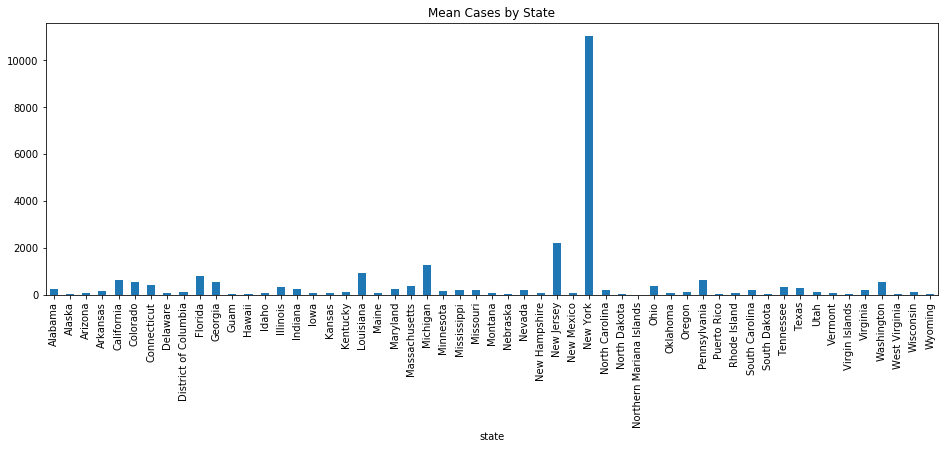

In [45]:
mean_cases.plot(kind='bar', figsize=(16,5), title="Mean Cases by State")

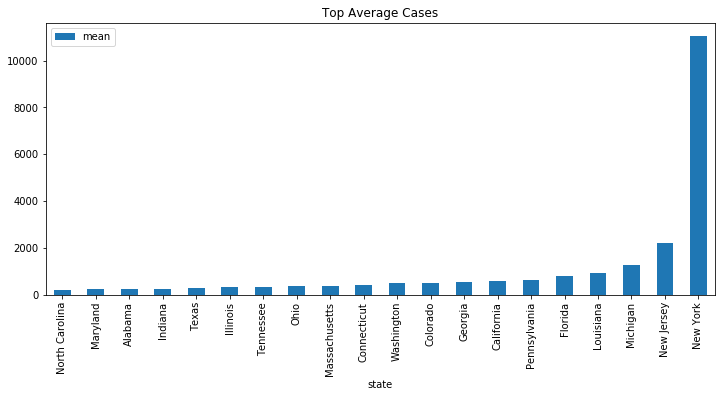

In [46]:
states.groupby('state')['cases'].agg(['mean', 'count']). \
    sort_values('mean'). \
    query('count > 10'). \
    tail(20). \
    plot(kind='bar', y='mean', title='Top Average Cases', figsize=(12,5))

In [47]:
state_cases = pd.read_csv('covid19-us-states.csv.gz', \
                          compression='gzip', sep='%', \
                          usecols=['date', 'state', 'cases', 'deaths'],
                          dtype={'state': 'str'},
                         parse_dates=['date'])

In [48]:
state_cases.dtypes

date      datetime64[ns]
state             object
cases              int64
deaths             int64
dtype: object